In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import classification_report

# pip install unidecode

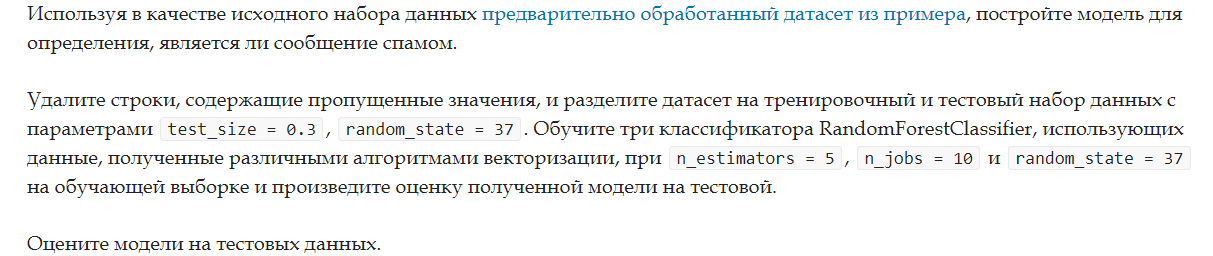

In [2]:
# гружу файл локально (можно скачать из ссылки задания)
df = pd.read_csv('Task_1_prepprocessed.csv')
df

,class,date,from,to,subject,body
0,0,4,info@global-change.com,michelle.lokay@enron.com,next wave energi trade,energi industri profession global chang associ...
1,0,1,info@pmaconference.com,michelle.lokay@enron.com,regist next txu capac auction,regist next txu energi capac auction new regis...
2,0,6,info@pmaconference.com,michelle.lokay@enron.com,merchant power monthli free sampl,merchant power monthli month s issu almost mw ...
3,0,3,bruno@firstconf.com,energynews@fc.ease.lsoft.com,eyeforenergi updat,welcom week s eyeforenergi updat refresh memor...
4,0,1,deanrogers@energyclasses.com,michelle.lokay@enron.com,deriv earli bird til march houston,deriv energi profession two full day april ear...
...,...,...,...,...,...,...
30687,1,3,jacob rzucidlo <lavoneaker@stalag13.com>,johnny wynott <varou@iit.demokritos.gr>,cpu pain m edicati n ship d r,arrghh west amnstv amlsmith basu petrom qureai...
30688,1,5,hal leake <annettgaskell@buglover.net>,renato mooney <sigletos@iit.demokritos.gr>,dn troubl f r ee,dn troubl f r ee angiospasma zekauskasa anarti...
30689,1,2,dr collins khumalo <khumalo_20@sunumail.sn>,khumalo_20@sunumail.sn,dr collin khumalo,dr collin khumalo attn mr presid dr collin khu...
30690,1,6,Customer Support <support@citibank.com>,Paliourg <paliourg@iit.demokritos.gr>,dear custom detail compromis,dear custom detail compromis dear custom recen...


# Часть 1

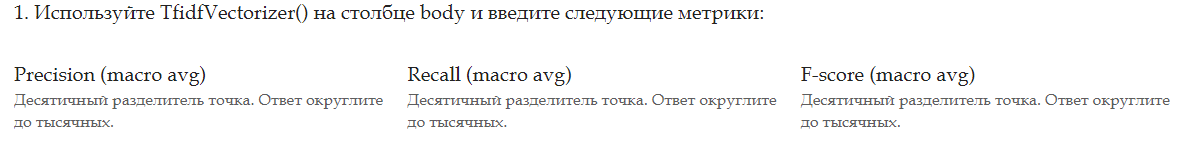

In [3]:
df.dropna(inplace = True) # дроп строк с пустыми значениям, замена дф

In [4]:
# разметка переменных для модели
x = df['body']
y = df['class']

In [5]:
# создаем переменные с помощью train_test_split (внутри помещаем размер выборок и разброс данных)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 37)

In [6]:
tfidf = TfidfVectorizer() # преобразуем текст в частотные векторы
x_train_tfidf = tfidf.fit_transform(x_train) # одновременно обучаем и преобразуем тренировочные данные
# преобразуем данные согласно ранее запомненным параметрам, полученным на тренировочной выборке
x_test_tfidf = tfidf.transform(x_test)

In [7]:
# задаем классификатор рандомного леса, в скобках параметры по условию
model = RandomForestClassifier(n_estimators = 5, n_jobs = 10, random_state = 37)
model.fit(x_train_tfidf, y_train)

RandomForestClassifier(n_estimators=5, n_jobs=10, random_state=37)

In [8]:
# делаем предикт модели
y_pred = model.predict(x_test_tfidf)

y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [9]:
# выводим отчет, ответ под 1ое задание
print(classification_report(y_test, y_pred, target_names=['spam', 'no_spam'], digits=3))

              precision    recall  f1-score   support

        spam      0.943     0.972     0.957      4751
     no_spam      0.967     0.934     0.950      4216

    accuracy                          0.954      8967
   macro avg      0.955     0.953     0.954      8967
weighted avg      0.954     0.954     0.954      8967



# Часть 2

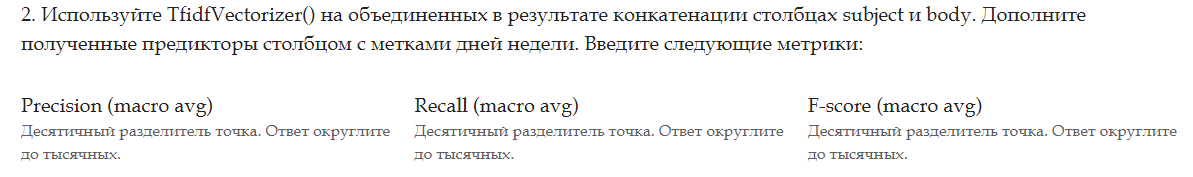

In [10]:
df

,class,date,from,to,subject,body
0,0,4,info@global-change.com,michelle.lokay@enron.com,next wave energi trade,energi industri profession global chang associ...
1,0,1,info@pmaconference.com,michelle.lokay@enron.com,regist next txu capac auction,regist next txu energi capac auction new regis...
2,0,6,info@pmaconference.com,michelle.lokay@enron.com,merchant power monthli free sampl,merchant power monthli month s issu almost mw ...
3,0,3,bruno@firstconf.com,energynews@fc.ease.lsoft.com,eyeforenergi updat,welcom week s eyeforenergi updat refresh memor...
4,0,1,deanrogers@energyclasses.com,michelle.lokay@enron.com,deriv earli bird til march houston,deriv energi profession two full day april ear...
...,...,...,...,...,...,...
30687,1,3,jacob rzucidlo <lavoneaker@stalag13.com>,johnny wynott <varou@iit.demokritos.gr>,cpu pain m edicati n ship d r,arrghh west amnstv amlsmith basu petrom qureai...
30688,1,5,hal leake <annettgaskell@buglover.net>,renato mooney <sigletos@iit.demokritos.gr>,dn troubl f r ee,dn troubl f r ee angiospasma zekauskasa anarti...
30689,1,2,dr collins khumalo <khumalo_20@sunumail.sn>,khumalo_20@sunumail.sn,dr collin khumalo,dr collin khumalo attn mr presid dr collin khu...
30690,1,6,Customer Support <support@citibank.com>,Paliourg <paliourg@iit.demokritos.gr>,dear custom detail compromis,dear custom detail compromis dear custom recen...


In [11]:
x = df['body'] + ' ' + df['subject'] # конкатенация по условию
y = df['class']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 37)

In [13]:
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [14]:
model = RandomForestClassifier(n_estimators = 5, n_jobs = 10, random_state = 37)
model.fit(x_train_tfidf, y_train)

RandomForestClassifier(n_estimators=5, n_jobs=10, random_state=37)

In [15]:
y_pred = model.predict(x_test_tfidf)

y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [16]:
print(classification_report(y_test, y_pred, target_names=['spam', 'no_spam'], digits=3))

              precision    recall  f1-score   support

        spam      0.953     0.972     0.963      4751
     no_spam      0.968     0.946     0.957      4216

    accuracy                          0.960      8967
   macro avg      0.961     0.959     0.960      8967
weighted avg      0.960     0.960     0.960      8967



# Часть 3

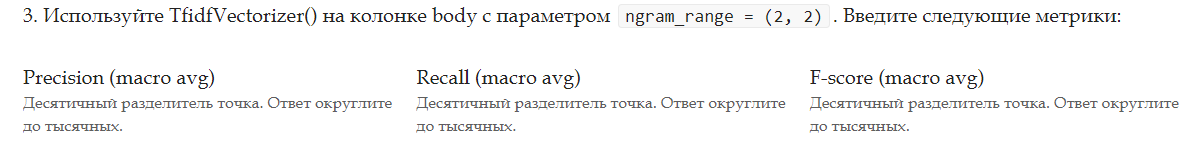

In [17]:
df

,class,date,from,to,subject,body
0,0,4,info@global-change.com,michelle.lokay@enron.com,next wave energi trade,energi industri profession global chang associ...
1,0,1,info@pmaconference.com,michelle.lokay@enron.com,regist next txu capac auction,regist next txu energi capac auction new regis...
2,0,6,info@pmaconference.com,michelle.lokay@enron.com,merchant power monthli free sampl,merchant power monthli month s issu almost mw ...
3,0,3,bruno@firstconf.com,energynews@fc.ease.lsoft.com,eyeforenergi updat,welcom week s eyeforenergi updat refresh memor...
4,0,1,deanrogers@energyclasses.com,michelle.lokay@enron.com,deriv earli bird til march houston,deriv energi profession two full day april ear...
...,...,...,...,...,...,...
30687,1,3,jacob rzucidlo <lavoneaker@stalag13.com>,johnny wynott <varou@iit.demokritos.gr>,cpu pain m edicati n ship d r,arrghh west amnstv amlsmith basu petrom qureai...
30688,1,5,hal leake <annettgaskell@buglover.net>,renato mooney <sigletos@iit.demokritos.gr>,dn troubl f r ee,dn troubl f r ee angiospasma zekauskasa anarti...
30689,1,2,dr collins khumalo <khumalo_20@sunumail.sn>,khumalo_20@sunumail.sn,dr collin khumalo,dr collin khumalo attn mr presid dr collin khu...
30690,1,6,Customer Support <support@citibank.com>,Paliourg <paliourg@iit.demokritos.gr>,dear custom detail compromis,dear custom detail compromis dear custom recen...


In [18]:
x = df['body']
y = df['class']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 37)

In [20]:
tfidf = TfidfVectorizer(ngram_range = (2, 2)) # ngram по условию
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [21]:
model = RandomForestClassifier(n_estimators = 5, n_jobs = 10, random_state = 37)
model.fit(x_train_tfidf, y_train)

RandomForestClassifier(n_estimators=5, n_jobs=10, random_state=37)

In [22]:
y_pred = model.predict(x_test_tfidf)

y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [23]:
print(classification_report(y_test, y_pred, target_names=['spam', 'no_spam'], digits=3))

              precision    recall  f1-score   support

        spam      0.976     0.939     0.957      4751
     no_spam      0.934     0.973     0.954      4216

    accuracy                          0.955      8967
   macro avg      0.955     0.956     0.955      8967
weighted avg      0.956     0.955     0.955      8967



# Часть 4

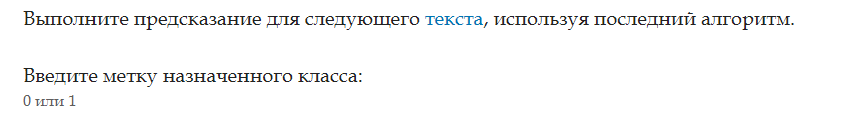

In [1]:
# https://courses.openedu.ru/assets/courseware/v1/19fc1d7951d2003371d47d68b7a72f56/asset-v1:ITMOUniversity+SOCNETAN+spring_2024_ITMO_bac+type@asset+block/task_1_P_test_11.csv

In [24]:
# текст из условия задания - хранится локально (нужно с сайта скачать себе)
task_1_P_test_11 = pd.read_csv('task_1_P_test_11.csv', header = None)
task_1_P_test_11

,0,1,2,3
0,80(% off mediccationn Mediccationns at lowesst...,pricess wontt get lowerr We selll vic'od(in v,ia.gra x,ana.x http://www.bushisatw= at123.com/?wid=3D1...


In [25]:
task_1_P_test_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1 non-null      object
 1   1       1 non-null      object
 2   2       1 non-null      object
 3   3       1 non-null      object
dtypes: object(4)
memory usage: 160.0+ bytes


#### смотрим полностью харнящийся текст

In [26]:
for i in task_1_P_test_11[0]:
    print(i)

80(% off mediccationn Mediccationns at lowesst pricess everyy ! Over 80.% offf


In [27]:
for i in task_1_P_test_11[1]:
    print(i)

 pricess wontt get lowerr We selll vic'od(in v


In [28]:
for i in task_1_P_test_11[2]:
    print(i)

ia.gra x


In [29]:
# конкатенируем инфу в один столбец чтобы получить общий текст
task_1_P_test_11['body'] = task_1_P_test_11[0] + '' + task_1_P_test_11[1] + '' + task_1_P_test_11[2]
task_1_P_test_11 = task_1_P_test_11[['body']]
task_1_P_test_11

,body
0,80(% off mediccationn Mediccationns at lowesst...


In [30]:
x = task_1_P_test_11['body']

In [31]:
x_test_tfidf = tfidf.transform(x)

In [32]:
y_pred = model.predict(x_test_tfidf)

y_pred

array([1])

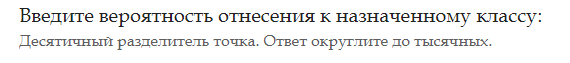

In [33]:
# Действующая классификация
rf_predictions = model.predict(x_test_tfidf)
# Вероятности для каждого класса
rf_probs = model.predict_proba(x_test_tfidf)[:, 1]
rf_probs

array([0.71832999])